<a href="https://colab.research.google.com/github/Tomaszlek/Data_Science_kursy/blob/main/google_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

In [3]:
raw_df = pd.read_excel('online_retail.xlsx')
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df = raw_df.copy()
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail_df = retail_df.dropna()
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
retail_df = retail_df[(retail_df.Quantity < 0) | (retail_df.UnitPrice < 0)]
retail_df.Quantity = abs(retail_df.Quantity)

In [16]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8905.000000,8905,8905.000000,8905.000000
mean,30.859966,2011-06-27 06:17:46.598540032,18.845519,14991.667266
min,1.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,1.000000,2011-03-22 16:07:00,1.450000,13510.000000
50%,2.000000,2011-07-11 13:51:00,2.950000,14895.000000
75%,6.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,80995.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1170.154939,NaN,444.366043,1706.772357


In [17]:
retail_df.query('InvoiceDate.notnull()')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
retail_df.groupby('CustomerID').size()

CustomerID
12346.0     1
12352.0    10
12359.0     6
12362.0     8
12365.0     1
           ..
18272.0     4
18274.0    11
18276.0     2
18277.0     1
18282.0     1
Length: 1589, dtype: int64

In [20]:
retail_df['Revenue'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [21]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,6.96


In [23]:
retail_df.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size}).\
rename({'Revenue': 'RevenueAvg', 'CustomerID' : 'CustomerIDCount'})

,Revenue,CustomerID
CustomerID,,
12346.0,77183.600000,1
12352.0,96.063000,10
12359.0,21.175000,6
12362.0,8.956250,8
12365.0,320.690000,1
...,...,...
18272.0,3.450000,4
18274.0,15.992727,11
18276.0,6.250000,2


In [25]:
retail_df['InvoiceDateDay'] = retail_df['InvoiceDate'].dt.day
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,27.50,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,4.65,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,19.80,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,6.96,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,6.96,1


<Axes: xlabel='InvoiceDateDay'>

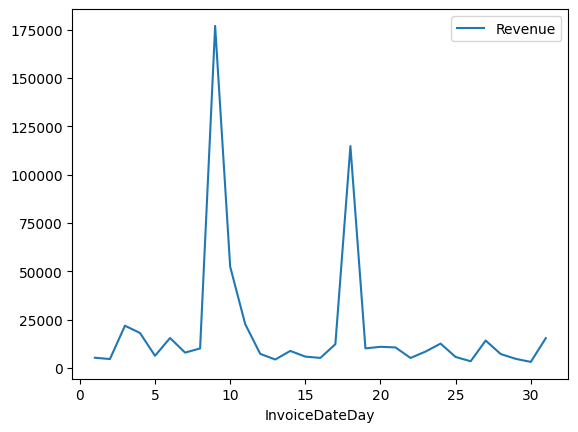

In [27]:
results = retail_df.groupby('InvoiceDateDay').aggregate({'Revenue': np.sum})
results.plot()

In [29]:
retail_df.nlargest(5, columns = 'Quantity')
retail_df.nsmallest(5, columns = 'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
141,C536379,D,Discount,1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,27.50,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,4.65,1
1441,C536543,22632,HAND WARMER RED RETROSPOT,1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom,2.10,1
1975,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,2010-12-01 14:33:00,2.95,12472.0,Germany,2.95,1
1977,C536548,22654,DELUXE SEWING KIT,1,2010-12-01 14:33:00,5.95,12472.0,Germany,5.95,1
